# 파이토치로 구현하는 ANN 

## 3.1 텐서와 Autograd 
### 3.1.1 텐서의 차원 자유자재로 다루기 

In [7]:
import torch

In [12]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)

print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


unsqueeze(), squeeze(), view() 함수로 텐서의 랭크와 shape를 인위적으로 바꿀 수도 있다. 
하지만 원소 개수를 바꿀 수는 없다. 

In [14]:
# 랭크 늘리기 
x = torch.unsqueeze(x,0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [16]:
# 랭크 줄이기 
x = torch.squeeze(x) 
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [17]:
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [18]:
try :
    x = x.view(2,4)
except Exception as e :
    print(e)

shape '[2, 4]' is invalid for input of size 9


### 3.1.2 텐서를 이용한 연산과 행렬곱 

행렬곱 구현
- 행렬 w : 정규분포에서 무작위로 값을 뽑아 텐서를 생성하는 randn() 함수에 5와 3을 인수로 전달하여 5X3의 shape를 가진 텐서를 만듭니다. 
    처음 두 인수는 행과 열의 개수이고, 세 번째 인수는 값의 타입입니다.
    무작위로 값을 뽑을 때 실수의 범위 내에서 뽑도록 randn() 함수의 인수 dtyoe에 torch.float를 지정합니다. 
    
- 행렬 x : 직접 실수형 원소들을 넣어 3x3의 shape를 가진 텐서를 정의합니다. 

In [19]:
w = torch.randn(5,3, dtype=torch.float )
x = torch.tensor([[1.0, 2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w :", w )
print("x :", x )

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w : tensor([[ 0.4065,  0.0574, -0.3496],
        [ 0.5343,  0.6252, -1.0652],
        [ 0.5003, -0.3460,  0.6285],
        [ 0.9004, -0.2614, -0.7104],
        [ 0.7983,  1.4097, -2.2399]])
x : tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [21]:
b = torch.randn(5,2,dtype = torch.float)
print("b size:", b.size())
print("b :", b )

b size: torch.Size([5, 2])
b : tensor([[ 1.6673,  0.8985],
        [-0.1609, -0.4531],
        [ 0.8526,  0.0911],
        [-1.1672, -0.3565],
        [ 0.7175, -0.3292]])


In [22]:
# 행렬 곱 
wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉  shape는 [5,2]입니다.
print("wx size:", wx.size())
print("wx :", wx )

wx size: torch.Size([5, 2])
wx : tensor([[-1.1694, -1.0551],
        [-2.9163, -2.8221],
        [ 2.6050,  3.3879],
        [-3.4358, -3.5072],
        [-6.1722, -6.2041]])


In [23]:
result = wx + b
print("result size:", result.size())
print("result :", result )

result size: torch.Size([5, 2])
result : tensor([[ 0.4979, -0.1566],
        [-3.0772, -3.2752],
        [ 3.4576,  3.4790],
        [-4.6030, -3.8637],
        [-5.4547, -6.5333]])


### 3.1.2 Autograd 
직역하면 '자동 기울기' 정도가 된다. 말 그대로 수시의 기울기를 자동으로 계산한다는 뜻이지만, 왜 이러한 계산이 
머신러닝이나 딥러닝에 관련이 있을까? 이것을 설명하기에 앞서 머신러닝의 일반적인 학습 방법에 대한 이해가 필요하다.

"경사하강법 : 오차를 수학 함수로 표현한 후 미분하여 이 함수의 기울기를 구해 오차의 최솟값이 있는 방향을 찾아내는 알고리즘"

복잡하지 않은 모델에서의 경사하강법은 넘파이 같으 라이브러리만 사용해서 직접 구현할 수도 있지만,
복잡한 인공 신경망 모델에서는 어렵고 머리 아픈 계산을 여러번 해줘야한다. 

In [24]:
 # 값이 1.0인 스칼라 텐서 w를 정의하고, 수식을 w에 대해 미분하여 기울기를 계산한다.
w = torch.tensor(1.0, requires_grad=True)

In [26]:
a = w*3 
l = a**2

In [28]:
# l = a^2 = 9w^2 
# backward() 함수로 미분
l.backward()
print('1을 w로 미분한 값은 {}'.format(w.grad))

1을 w로 미분한 값은 18.0


### 3.2 경사하강법으로 이미지 복원하기 

이미지 처리를 위해 만들어 두었던 weired_function() 함수에 실수로 버그가 들어가 100x100 픽셀의 오염된 이미지가 만들어진 상황.

보통의 접근방법 
1. weired_function() 함수의 소스코드를 분석한다.
2. 분석을 토대로 weired_function() 함수의 동작을 반대로 이행하는 함수를 구현한다.
3. 2에서 구현한 함수에 오염된 이미지를 입력해서 복구된 이미지를 출력한다. 

머신러닝과 수학적 최적화에 가까운 방법 
1. 오염된 이미지(broke_image)와 크기가 같은 랜덤 텐서(random_tensor)를 생성한다. 
2. 랜덤 텐서를 weired_function() 함수에 똑같이 오염된 이미지 가설이라고 부른다. 
    a. [사실] 원본 이미지가 weired_function() 함수에 입력되어 오염된 이미지를 출력했다.
    b. [사실] 인위적으로 생성한 무작위 이미지가 weired_function() 함수에 입력되어 가설을 출력했다. 
3. 가설과 오염된 이미지가 같다면, 무작위 이미지와 원본 이미지도 같을 것이다.
4. 그러므로 weired_function(random_tensor)=broken_image 관계가 성립하도록 만든다.

머신러닝 모델이 학습한다는 것은 모델이 출력한 결괏값과 정답의 차이, 
즉 오차가 최소화된다는 뜻이기도 하다.



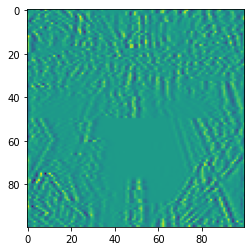

In [39]:
import torch
import pickle 
import matplotlib.pyplot as plt 

broken_image = torch.FloatTensor( pickle.load(open('./data/broken_image_t.p', 'rb'), encoding='latin1'))
plt.imshow(broke_image.view(100,100))


In [40]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [41]:
# 무작위 텐서(random_tensor)를 weird_function() 함수에 입력해 얻은 가설텐서와 오염된 이미지 사이의 오차를 구하는 함수 
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

# 무작위 값을 가진 텐서 생성 
random_tensor = torch.randn(10000, dtype = torch.float )

# 학습률 
lr = 0.8

Loss at 0 = 12.394465446472168
Loss at 1000 = 1.2032550573349
Loss at 2000 = 0.5635125041007996
Loss at 3000 = 0.38652074337005615
Loss at 4000 = 0.30312278866767883
Loss at 5000 = 0.25225943326950073
Loss at 6000 = 0.21627993881702423
Loss at 7000 = 0.18813833594322205
Loss at 8000 = 0.16451960802078247
Loss at 9000 = 0.14370736479759216
Loss at 10000 = 0.12474897503852844
Loss at 11000 = 0.10708349943161011
Loss at 12000 = 0.09036041796207428
Loss at 13000 = 0.07434938848018646
Loss at 14000 = 0.05889184772968292
Loss at 15000 = 0.04387484863400459
Loss at 16000 = 0.02921869419515133
Loss at 17000 = 0.021154064685106277
Loss at 18000 = 0.021166140213608742
Loss at 19000 = 0.021167701110243797


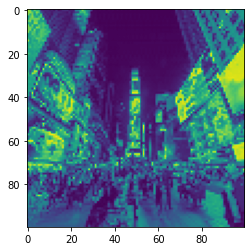

In [42]:
# 경사하강법 구현 
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))


plt.imshow(random_tensor.view(100,100).data)
